# Response to a filter
I am creating a filtered response here. I want to see what happens in the longe term when a filter receives a train of pulses. 
* One pulse, response to length and amplitude.

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=3)

sns.set(font_scale=3.5)

## One pulse response

In [2]:
dt = 0.001
T = 1.0
time = np.arange(0, T + dt, dt)

100 200 500
0
600 700 1000
1


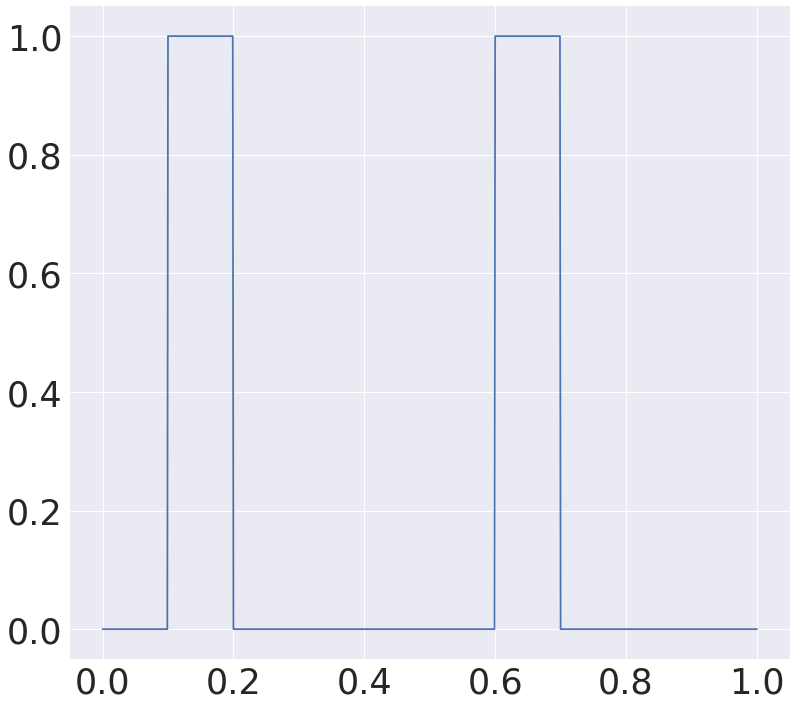

In [25]:
start = 0.100
length = 0.100
space = 0.300
amplitude = 1.0
pulses = 2
box = np.zeros(time.size)

tracker = 0
for i in range(pulses): 
    start_point = int(start / dt) + tracker
    end_point = int((start + length) / dt) + tracker
    box[start_point:end_point] = amplitude
    tracker = end_point + int(space / dt)
    
    print(start_point, end_point, tracker)
    print(i)

    plt.plot(time, box);

In [19]:
tau = 10.0
initial = 0.5
p = np.zeros(box.size)
p[0] = initial
for t in range(box.size - 1):
    p[t + 1] = p[t] + (dt / tau) * (box[t] - p[t])
    
plt.plot(time, box)
plt.plot(time, p);

Let's make this functions

In [37]:
def create_box(time, start, space, lengths, amplitudes):
    dt  = time[1] - time[0]
    box = np.zeros(time.size)
    
    tracker = 0
    for length, amplitude in zip(lengths, amplitudes):
        start_point = int(start / dt) + tracker
        end_point = int((start + length) / dt) + tracker
        box[start_point:end_point] = amplitude
        tracker = end_point + int(space / dt)
        
    return box

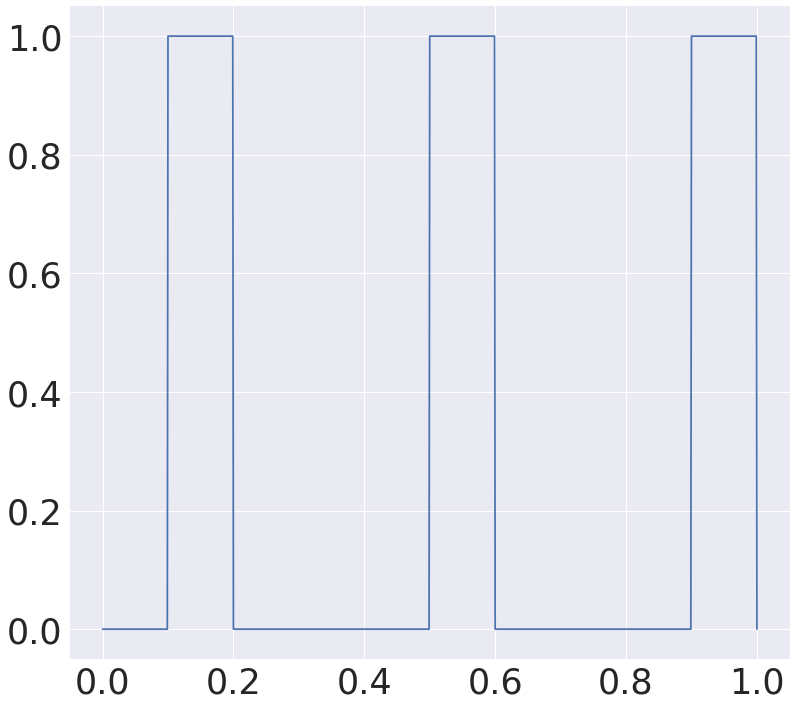

In [40]:
dt = 0.001
T = 1.0
time = np.arange(0, T + dt, dt)
start = 0.100
pulses = 3
lengths = [0.100 for i in range(pulses)]
amplitude = [1.0 for i in range(pulses)]
space = 0.200

box = create_box(time, start, space, lengths, amplitude)
plt.plot(time, box);

In [41]:
def calculate_filter(dt, tau, initial, function):
    p = np.zeros(function.size)
    p[0] = initial
    for t in range(function.size - 1):
        p[t + 1] = p[t] + (dt / tau) * (function[t] - p[t])
        
    return p

(-0.05, 1.05)

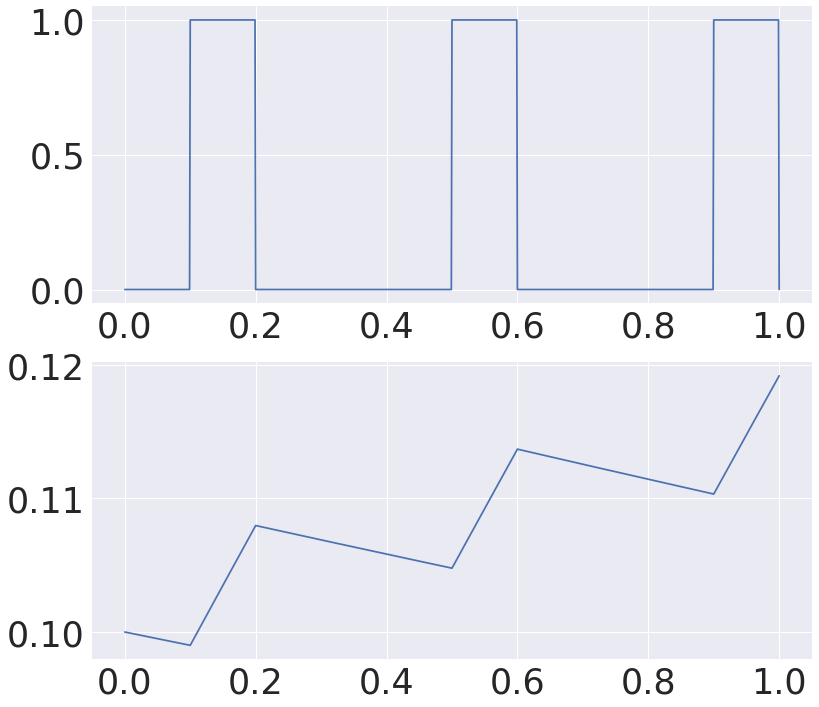

In [48]:
tau = 10.0
initial = 0.1
p = calculate_filter(dt, tau, initial, box)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(time, box)
ax2.plot(time, p);

ax1.set_ylim([-0.05, 1.05])
# ax2.set_ylim([-0.05, 1.05]);

## Response to different amplitudes

In [56]:
dt = 0.001
T = 1.0
time = np.arange(0, T + dt, dt)
start = 0.100
pulses = 1
space = 0.200
lengths = [0.100 for i in range(pulses)]
amplitudes_set = [0.1, 0.25, 0.5, 0.75, 1.0]


tau = 10.0
initial = 0.1
filters = []
boxes = []

for amplitude in amplitudes_set:

    amplitudes = [amplitude for i in range(pulses)]
    box = create_box(time, start, space, lengths, amplitudes)
    p = calculate_filter(dt, tau, initial, box)
    filters.append(p)
    boxes.append(box)

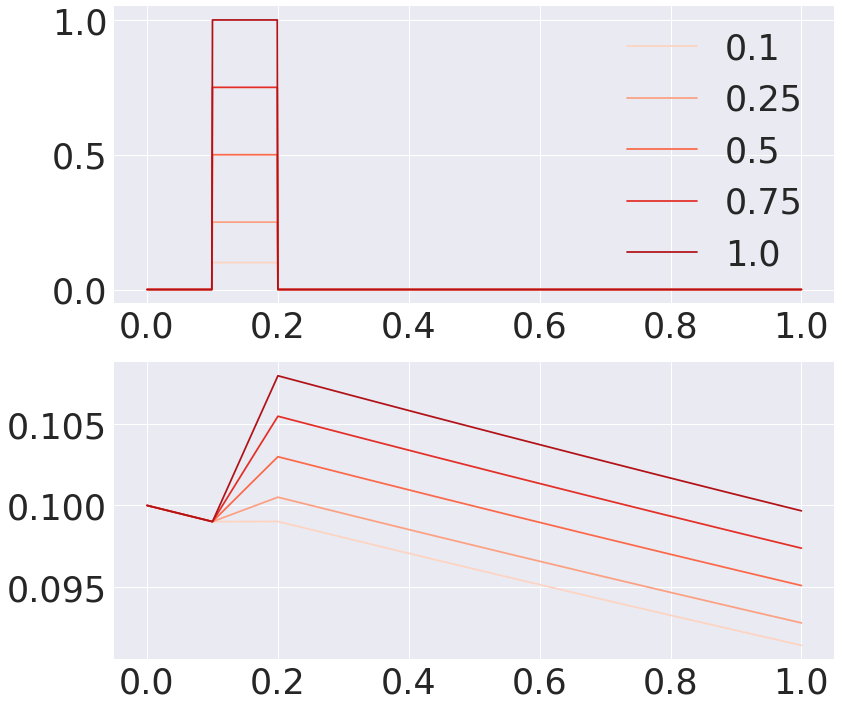

In [57]:
palette = sns.color_palette("Reds", len(amplitudes_set))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for index, (amplitude, p) in enumerate(zip(amplitudes_set, filters)):
    ax1.plot(time, boxes[index], color=palette[index], label=str(amplitude))
    ax2.plot(time, p, color=palette[index])
    
ax1.legend();

## Response to different lenghts

In [59]:
dt = 0.001
T = 1.0
time = np.arange(0, T + dt, dt)
start = 0.100
pulses = 1
space = 0.200
lengths_set = [0.100, 0.200, 0.300, 0.400, 0.500]
amplitude = 1.0


tau = 10.0
initial = 0.1
filters = []
boxes = []

for length in lengths_set:
    lengths = [length for i in range(pulses)]
    amplitudes = [amplitude for i in range(pulses)]
    box = create_box(time, start, space, lengths, amplitudes)
    p = calculate_filter(dt, tau, initial, box)
    filters.append(p)
    boxes.append(box)

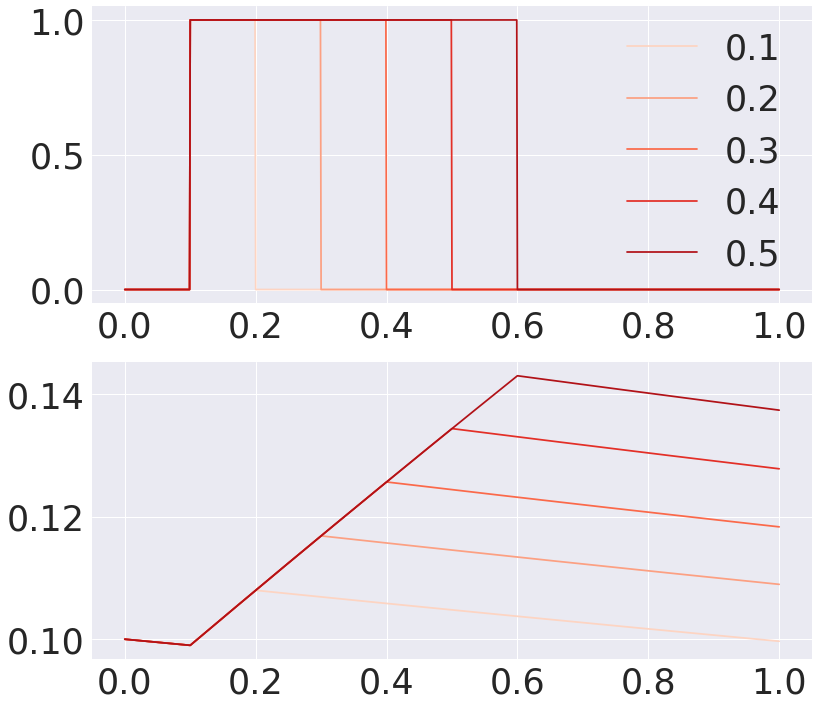

In [62]:
palette = sns.color_palette("Reds", len(lengths_set))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for index, (length, p) in enumerate(zip(lengths_set, filters)):
    ax1.plot(time, boxes[index], color=palette[index], label=str(length))
    ax2.plot(time, p, color=palette[index])
    
ax1.legend();

The thing is that when you put make the length of pattern longer you increase the time of decay, let's try the above scenarion but with longer (proportional time of decay)

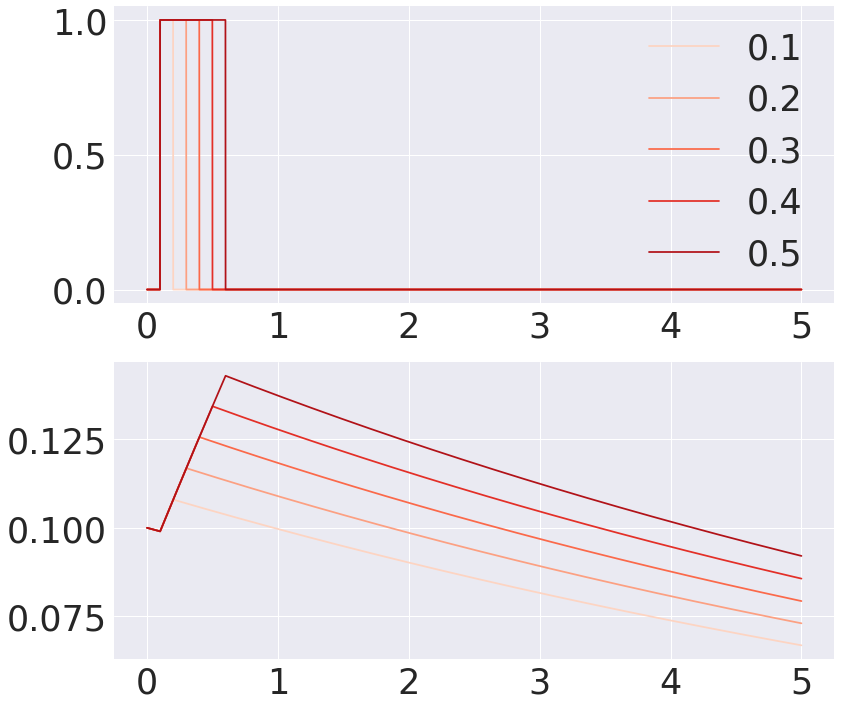

In [66]:
dt = 0.001
T = 10 * 0.500
time = np.arange(0, T + dt, dt)
start = 0.100
pulses = 1
space = 0.200
lengths_set = [0.100, 0.200, 0.300, 0.400, 0.500]
amplitude = 1.0


tau = 10.0
initial = 0.1
filters = []
boxes = []

for length in lengths_set:
    lengths = [length for i in range(pulses)]
    amplitudes = [amplitude for i in range(pulses)]
    box = create_box(time, start, space, lengths, amplitudes)
    p = calculate_filter(dt, tau, initial, box)
    filters.append(p)
    boxes.append(box)
    
palette = sns.color_palette("Reds", len(lengths_set))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for index, (length, p) in enumerate(zip(lengths_set, filters)):
    ax1.plot(time, boxes[index], color=palette[index], label=str(length))
    ax2.plot(time, p, color=palette[index])
    
ax1.legend();